<a href="https://colab.research.google.com/github/harnalashok/DataVisualization/blob/master/partial_dependence_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 10th June, 2022
# My folder: 
# 

make_hastie dataset<br>
It is a randomly generated classification dataset. Data is generated for binary classification used. IT has been used by Hastie in his book of 2009, Example 10.2.  The ten features are standard independent Gaussian and the target y is defined by:

y[i] = 1 if np.sum(X[i] ** 2) > 9.34 else -1



In [4]:
from sklearn.datasets import make_hastie_10_2

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from matplotlib import pyplot  as plt

In [2]:
X, y = make_hastie_10_2(random_state=0)

In [6]:
X.shape   # (12000, 10)

(12000, 10)

In [8]:
X[:3,:]

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877]])

In [ ]:
y.shape

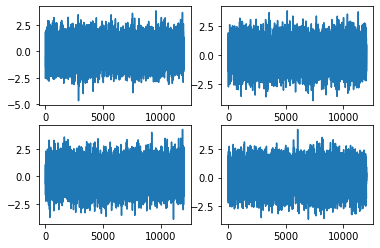

In [14]:
# Plot of first three columns
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
ax[0].plot(X[:,0]);
ax[1].plot(X[:,1]);
ax[2].plot(X[:,2]);
ax[3].plot(X[:,3]);

In [ ]:
clf = GradientBoostingClassifier(
                                  n_estimators=100,
                                  learning_rate=1.0,
                                   max_depth=1,
                                  random_state=0
                                  )

clf.fit(X, y)

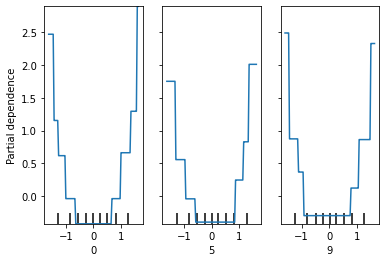

In [18]:
# Get three pdp plots for features with index 0,5,9
features = [0,5,9]
PartialDependenceDisplay.from_estimator(clf, X, features) ;

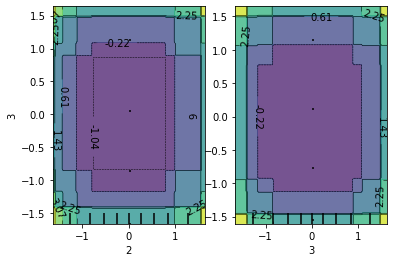

In [19]:
# Get pdp plots for combination of fetaures (2,3) and with features (3,9)
#  Note in our data feature with index 10 does not exist.
features = [(2,3), (3,9)]
PartialDependenceDisplay.from_estimator(clf, X, features) ;